# MOHNISH PAMNANI
## GRIP JULY'21
## TASK 2 : In this task ,we have to Predict the optimal number of clusters from the 'iris' dataset and also we need to represent it visually

In [1]:
# Importing Libraries
import numpy as np                     # For Matrix Creation & Manipulation
import pandas as pd                    # For Data Structuring & Manipulation
import matplotlib.pyplot as plt        # For Data Visualisation
%matplotlib inline
import seaborn as sns                  # For Data Visualisation
sns.set()

### Loading the dataset

In [2]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Checking the Size of the Data
### In this section we use "shape" attribute of Dataframe which returns a tuple in which first element represent number of rows and second one represent the number of columns.¶

In [3]:
data.shape

(150, 6)

# Checking for Null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Summary Statistics

In [5]:
data.describe(include = 'all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


## Checking for unique values in species

In [6]:
data['Species'].value_counts().to_frame()

,Species
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


## Extracting Useful Features

In [7]:
df = data.drop('Id', axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Visualisation of data using Pair Plot
#### Now, we visualize our data in which we use pairplot which plot the graphs for every possible pairs of features in the dataset.

Text(0.5, 1.02, 'Data Visualisation for Every Feature pair of the Dataset')

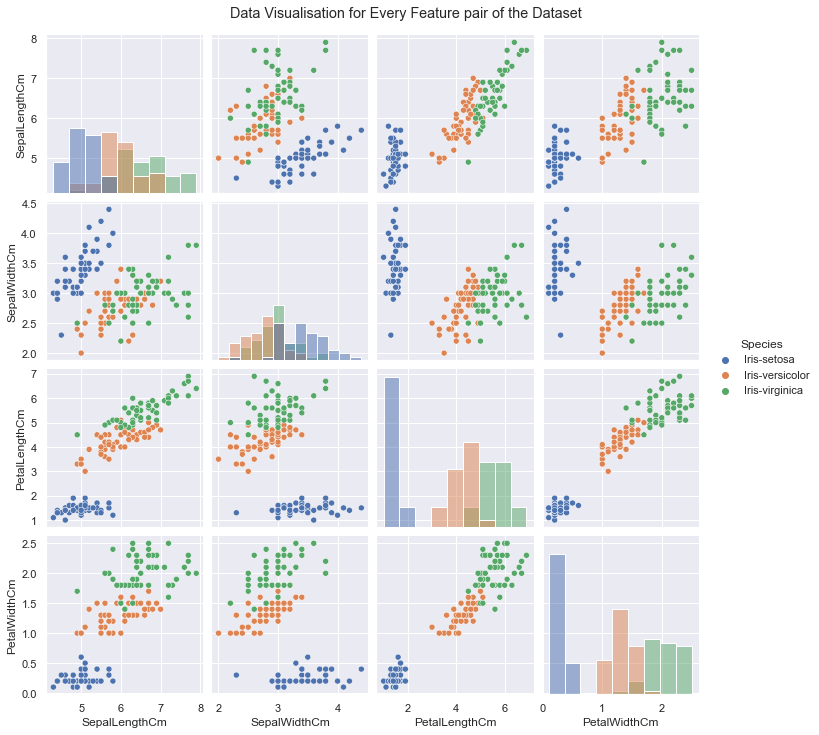

In [8]:
visual = sns.pairplot(df, hue = 'Species', diag_kind = 'hist')
visual.fig.suptitle("Data Visualisation for Every Feature pair of the Dataset", y = 1.02)

# Model Development
### Importing KMeans class for Clustering from the Scikit-Learn Library

In [9]:
from sklearn.cluster import KMeans

### Creating an Array for the Model to train and perform the Clustering

In [10]:
X = df.iloc[:,[0,1,2,3]].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Finding the Optimum number of Clusters using Elbow method

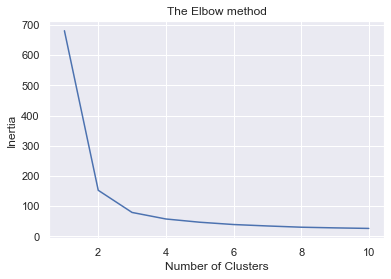

In [11]:
WCSS = []     # Within-Cluster Sum of Square

for i in range(1,11):
    cluster_model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    cluster_model.fit(X)
    WCSS.append(cluster_model.inertia_)
    
plt.plot(range(1,11), WCSS)
plt.title("The Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

### Clustering the Data with 3 clusters 

In [12]:
cluster_model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_clusters = cluster_model.fit_predict(X)
y_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Visualisation of the Clusters

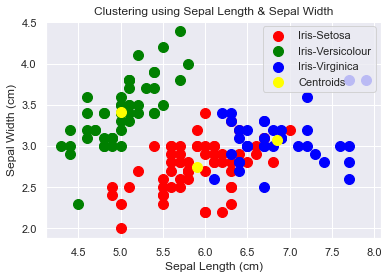

In [13]:
plt.scatter(X[y_clusters==0, 0], X[y_clusters==0, 1], s = 100, c = 'red', label = 'Iris-Setosa')
plt.scatter(X[y_clusters==1, 0], X[y_clusters==1, 1], s = 100, c = 'green', label = 'Iris-Versicolour')
plt.scatter(X[y_clusters==2, 0], X[y_clusters==2, 1], s = 100, c = 'blue', label = 'Iris-Virginica')
plt.scatter(cluster_model.cluster_centers_[:,0], cluster_model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title("Clustering using Sepal Length & Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.show()

### Here, We representing the Clusters based on the Petal Length and its Width.

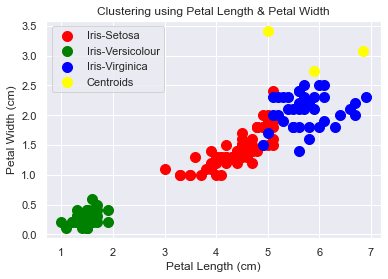

In [14]:
plt.scatter(X[y_clusters==0, 2], X[y_clusters==0, 3], s = 100, c = 'red', label = 'Iris-Setosa')
plt.scatter(X[y_clusters==1, 2], X[y_clusters==1, 3], s = 100, c = 'green', label = 'Iris-Versicolour')
plt.scatter(X[y_clusters==2, 2], X[y_clusters==2, 3], s = 100, c = 'blue', label = 'Iris-Virginica')
plt.scatter(cluster_model.cluster_centers_[:,0], cluster_model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title("Clustering using Petal Length & Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.show()